## 14.1 数据清理

### 14.1.1 缺失值处理

#### （1）发现缺失值

In [2]:
import pandas as pd
import numpy as np

# 将数据存储在 DataFrame 对象中
data = pd.DataFrame({ 'name':['Kite','Lily','Anna'],
                      'English':[92,78,np.nan],
                      'Math':[69,87,91],
                      'Chinese':[np.nan,78,96]})   
print(data.isnull())    #查看所有缺失值

    name  English   Math  Chinese
0  False    False  False     True
1  False    False  False    False
2  False     True  False    False


In [3]:
# 检查含有缺失值的列
columns_with_nan = data.isnull().any()
print("含有缺失值的列：")
print(columns_with_nan)

含有缺失值的列：
name       False
English     True
Math       False
Chinese     True
dtype: bool


In [4]:
# 检查全部为缺失值的列
columns_all_nan = data.isnull().all()
print("全部为缺失值的列：")
print(columns_all_nan)

全部为缺失值的列：
name       False
English    False
Math       False
Chinese    False
dtype: bool


#### （2）处理缺失值

In [5]:
cleaned_df = data.dropna()    # 删除含有任何缺失值的行
print(cleaned_df)

   name  English  Math  Chinese
1  Lily     78.0    87     78.0


In [6]:
#定义DataFrame对象并指定列的名称
df = pd.DataFrame([[np.nan,2,np.nan,0],
                   [3,4,np.nan,1],
                   [np.nan,np.nan,np.nan,5],
                   [np.nan,3,np.nan,4]],
                  columns=list('ABCD')) 
#输出df
print(df)      

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4


In [7]:
'''将所有NaN值用0替换'''
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [8]:
'''用前面或后面的非空值替换NaN值'''
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [9]:
'''将列 'A'、'B'、'C'和'D'中的所有NaN元素分别替换为0、1、2和3'''
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}     #定义用于替换的值字典
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [10]:
'''只替换每一列中的第一个缺失值'''
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,NaN,1
2,NaN,1.0,NaN,5
3,NaN,3.0,NaN,4


### 14.1.3 重复值处理

In [11]:
# 创建数据集
data = {'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', 'Alice', 'David', 'Bob'],
        'Age': [25, 30, 25, 35, 30],
        'City': ['New York', 'Chicago', 'New York', 'Boston', 'Chicago']}
df = pd.DataFrame(data)
# 检查重复记录
duplicates = df.duplicated(subset=['Name', 'Age', 'City'])
print(duplicates)

0    False
1    False
2     True
3    False
4     True
dtype: bool


In [12]:
df_cleaned = df.drop_duplicates(subset=['Name', 'Age', 'City'])
print(df_cleaned)

   ID   Name  Age      City
0   1  Alice   25  New York
1   2    Bob   30   Chicago
3   4  David   35    Boston


## 14.5 数据分析实践

### 14.5.1 数据加载与预处理

（1）数据加载

In [13]:
import pandas as pd

url = "./adult.data"    # 数据文件地址
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
      "marital-status", "occupation", "relationship", "race", "sex", 
      "capital-gain", "capital-loss", "hours-per-week", "native-country", 
      "income"]
raw_data = pd.read_csv(url, header=None, names=column_names, na_values=" ?")

In [14]:
# 使用 info() 查看数据集的基本情况
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


（2）缺失值处理

In [15]:
# 检查缺失值的数量
missing_data = raw_data.isnull().sum()
print(missing_data[missing_data > 0])

workclass         1836
occupation        1843
native-country     583
dtype: int64


In [16]:
fill_na = lambda col:col.fillna(col.mode()[0])  #定义fill_na函数，用众数填充缺失值

fill_data = raw_data.apply(fill_na, axis=0)     #将填充后的数据赋给fill_data

In [17]:
fill_data.isnull().any()        #检查是否填充成功

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

（3）重复值处理

In [18]:
# 检查重复值的数量
duplicate_data = fill_data.duplicated().sum()
print(f"数据集中共有 {duplicate_data} 条重复记录")

# 查看重复值的具体记录（如有）
if duplicate_data > 0:
    print("重复记录如下：")
    print(fill_data[fill_data.duplicated()])
else:
    print("数据集中没有重复记录")

数据集中共有 24 条重复记录
重复记录如下：
       age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th 

In [19]:
# 标记重复值，keep=False 保留所有重复的记录
duplicates = fill_data[fill_data.duplicated(keep=False)]
# 对重复值按照所有列进行排序，使重复记录显示在一起
duplicates_sorted = duplicates.sort_values(by=fill_data.columns.tolist())
# 输出重复值
print(duplicates_sorted)

       age          workclass  fnlwgt      education  education-num  \
17673   19            Private   97261        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
6990    19            Private  138153   Some-college             10   
21318   19            Private  138153   Some-college             10   
15189   19            Private  146679   Some-college             10   
21490   19            Private  146679   Some-college             10   
3917    19            Private  251579   Some-college             10   
31993   19            Private  251579   Some-college             10   
5805    20            Private  107658   Some-college             10   
11631   20            Private  107658   Some-college             10   
8080    21            Private  243368      Preschool              1   
15059   21            Private  243368      Preschool              1   
4767    21            Private  250051   Some-college             10   
9171  

In [20]:
# 删除重复值，保留第一次出现的记录
fill_data = fill_data.drop_duplicates()
print(f"处理后数据集的记录数量为：{fill_data.shape[0]}")

# 检查重复值的数量
duplicate_data = fill_data.duplicated().sum()
print(f"数据集中共有 {duplicate_data} 条重复记录")

处理后数据集的记录数量为：32537
数据集中共有 0 条重复记录


### 14.5.2 数据转换

- **删除无关属性**

In [21]:
# 数据已加载到 fill_data
data = fill_data.drop(columns=['fnlwgt'])   # 删除 fnlwgt 属性列
print(data.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


- **离散化连续属性**

In [22]:
# 定义年龄区间
bins = [0, 25, 45, 65, 100]
labels = ['青年', '中年', '中老', '老年']

# 使用 cut 函数进行离散化
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# 统计每个区间的个数
age_group_counts = data['age_group'].value_counts()
print(age_group_counts)

中年    16515
中老     8465
青年     6400
老年     1157
Name: age_group, dtype: int64


- **标准化数值型变量**

In [23]:
from sklearn.preprocessing import MinMaxScaler

# 选择需要标准化的列
numeric_columns = ['hours-per-week']

# 初始化归一化器
scaler = MinMaxScaler()

# 归一化处理
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [24]:
print(data[numeric_columns].describe())

       hours-per-week
count    32537.000000
mean         0.402452
std          0.125989
min          0.000000
25%          0.397959
50%          0.397959
75%          0.448980
max          1.000000


- **合并稀疏类别**

将 native-country 中频次较低的类别合并为 “Other”：

In [25]:
# 计算每个类别的频率
country_counts = data['native-country'].value_counts()
# 定义频率较低的阈值
threshold = 100

# 将频次低于阈值的类别替换为 "Other"
data['native-country'] = data['native-country'].apply(
            lambda x: x if country_counts[x] >= threshold else 'Other')
print(data['native-country'].value_counts())

 United-States    29735
Other              1387
 Mexico             639
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
Name: native-country, dtype: int64


### 14.5.3 探索性分析

#### （1）类别变量的频率分布

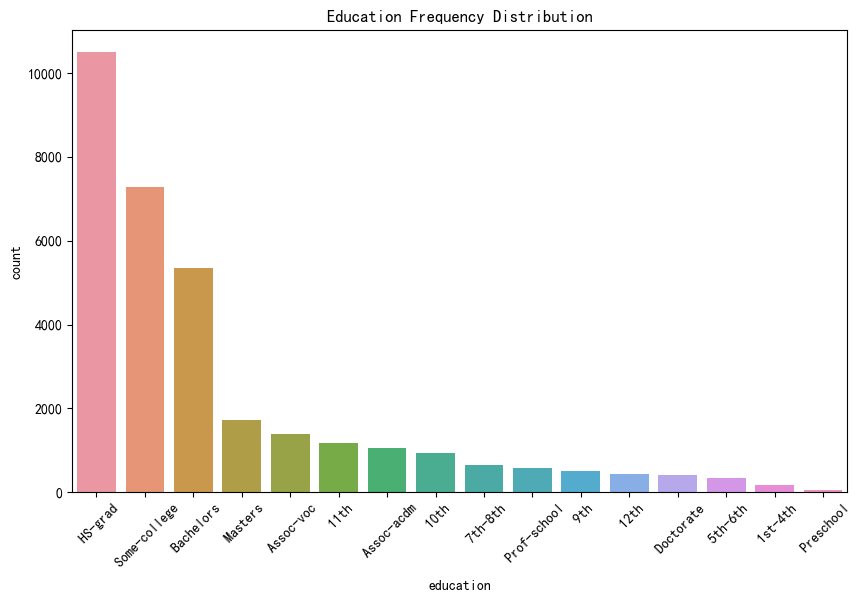

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制 'education' 的频率分布条形图
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.title('Education Frequency Distribution')

plt.xticks(rotation=45)
plt.show()

#### （2）异常值检测

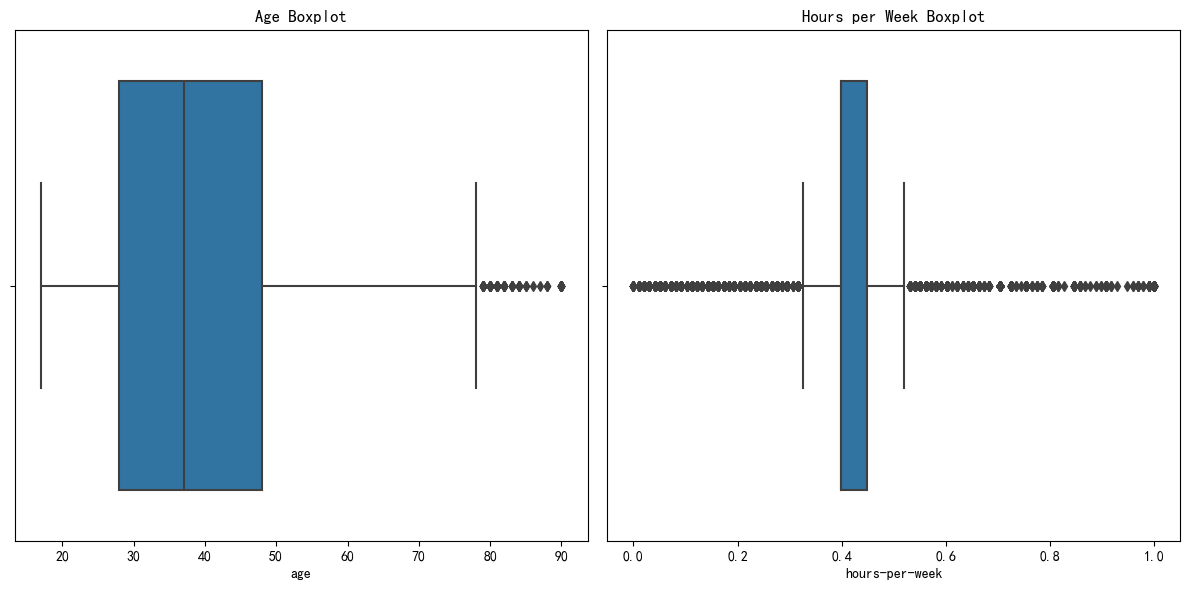

In [27]:
# 绘制 'age' 和 'hours-per-week' 的箱线图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='age')
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='hours-per-week')
plt.title('Hours per Week Boxplot')

plt.tight_layout()
plt.show()

#### （3）目标变量分布分析

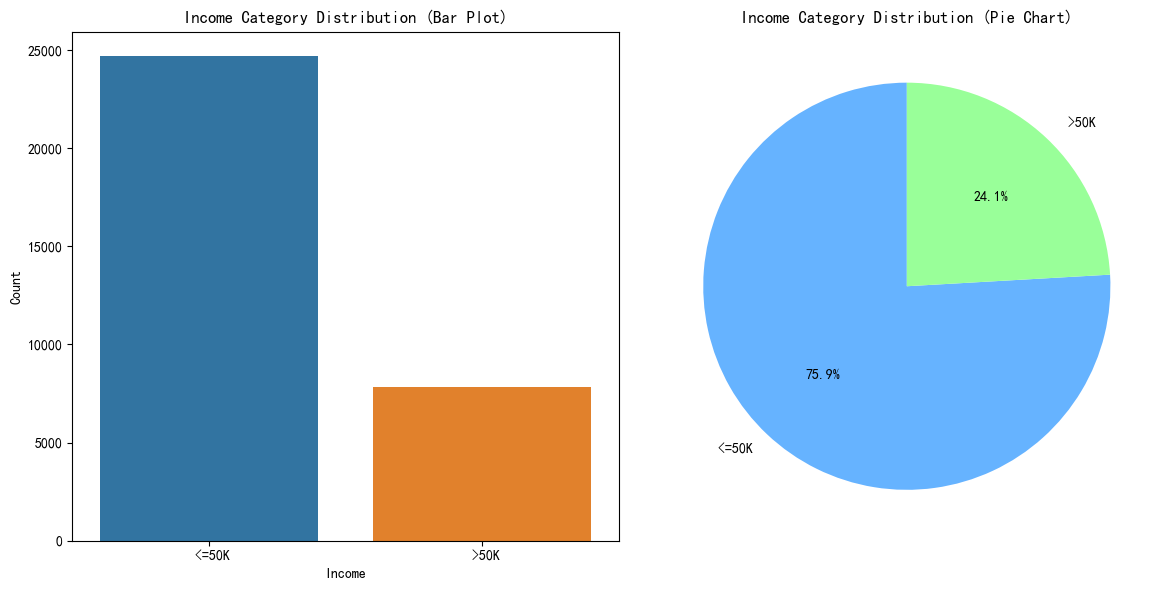

In [28]:
# 创建图形画布
plt.figure(figsize=(12, 6))

# 子图 1: 条形图
plt.subplot(1, 2, 1)  # 一行两列的第一个子图
sns.countplot(data=data, x='income')
plt.title('Income Category Distribution (Bar Plot)')
plt.xlabel('Income')
plt.ylabel('Count')

# 子图 2: 饼图
plt.subplot(1, 2, 2)  # 一行两列的第二个子图
income_counts = data['income'].value_counts()
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Income Category Distribution (Pie Chart)')
plt.ylabel('')  # 去掉 y 轴标签

# 显示图形
plt.tight_layout()  # 调整子图间距
plt.show()

#### （4）数值变量的分布分析

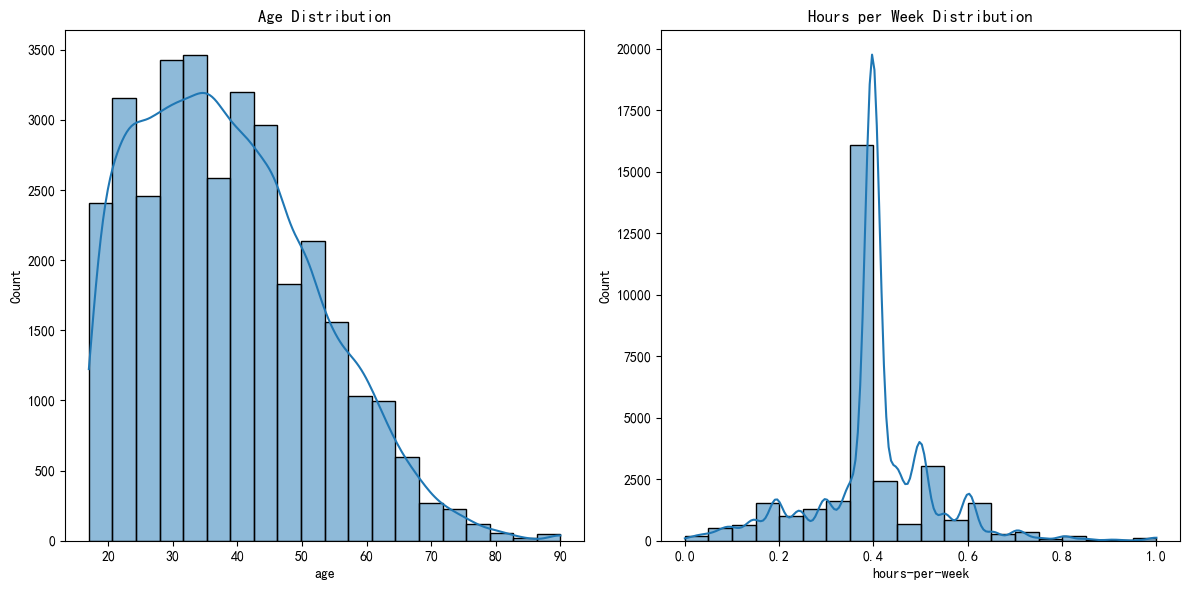

In [29]:
# 绘制 'age' 和 'hours-per-week' 的直方图及KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['hours-per-week'], kde=True, bins=20)
plt.title('Hours per Week Distribution')

plt.tight_layout()
plt.show()

#### （5）分组分析

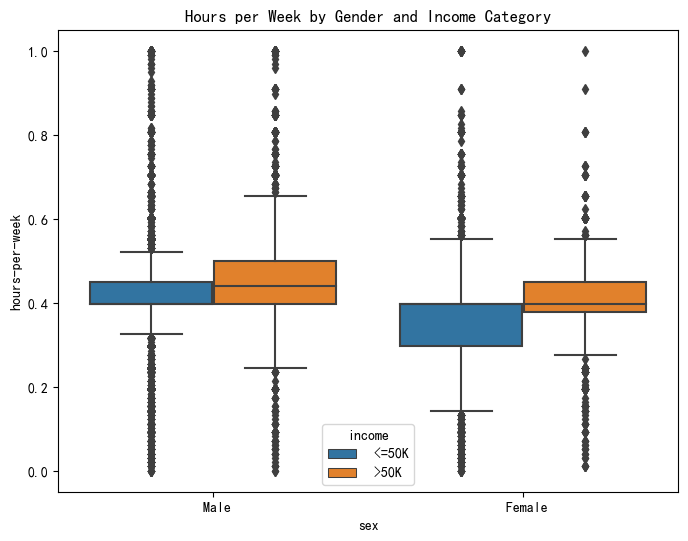

In [30]:
# 绘制 'income' 按性别分组的 'hours-per-week' 分布
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='hours-per-week', hue='income')
plt.title('Hours per Week by Gender and Income Category')
plt.show()

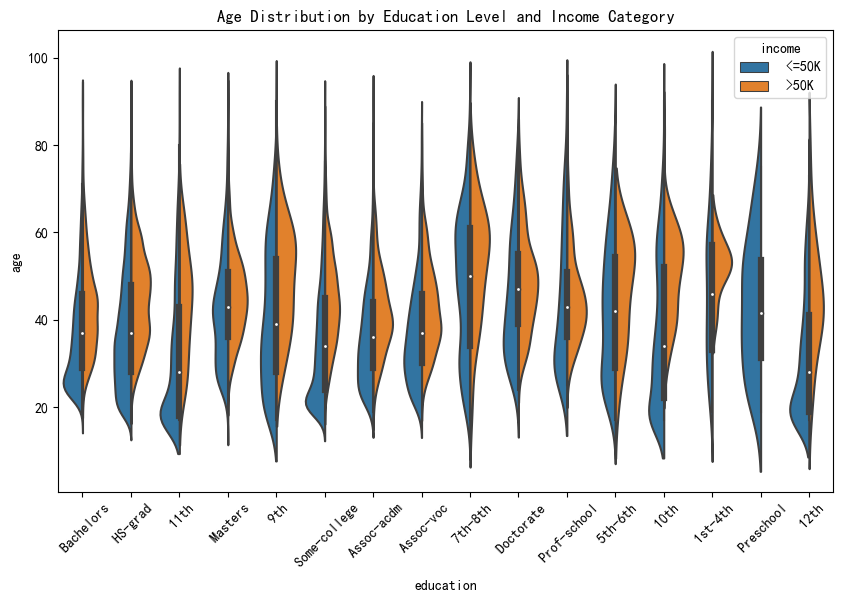

In [31]:
# 绘制 'income' 按教育水平分组的 'age' 分布
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='education', y='age', hue='income', split=True)
plt.title('Age Distribution by Education Level and Income Category')
plt.xticks(rotation=45)
plt.show()

### 14.5.4 相关性分析

#### （1）对 `education` 和 `income` 列进行编码

In [32]:
from sklearn.preprocessing import LabelEncoder
   
# 创建 LabelEncoder 对象
label_encoder = LabelEncoder()
   
# 对 'education' 列进行编码
data['education'] = label_encoder.fit_transform(data['education'])
   
# 对 'income' 列进行编码，将 '<=50K' 映射为 0，'>50K' 映射为 1
data['income'] = label_encoder.fit_transform(data['income'])

#### （2）计算皮尔逊相关系数

In [33]:
# 计算皮尔逊相关系数
correlation_matrix = data[['education', 'income']].corr(method='pearson')

# 输出皮尔逊相关系数
print("Pearson correlation between education and income:",correlation_matrix.iloc[0,1])

Pearson correlation between education and income: 0.07936641008303238


#### （3）绘制热力图

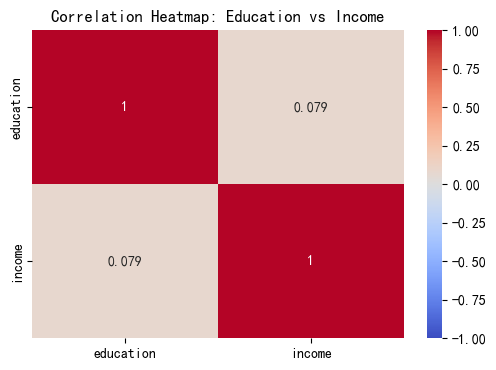

In [34]:
# 使用 Seaborn 绘制相关性热力图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap: Education vs Income")
plt.show()